# **METADATA**


**1.- Descripción de los datos.** Este dataset presenta información sobre campañas publicitarias en redes sociales. Permite analizar la efectividad de cada plataforma, el impacto en la audiencia y la rentabilidad de las campañas digitales. Al ser una fuente de datos con poca variabilidad y totalmente limpia, procedí a desordenarla e integrarle variabilidad a los datos con el objetivo de aprender las tecnicas de limpieza y normalización vistas en el curso. Este dataset consta de 200.000 registros, 16 columnas. Fuente: https://www.kaggle.com/datasets/manishabhatt22/marketing-campaign-performance-dataset/data


**2.- Diccionario de datos.**

Campaign_ID: Identificador único de cada campaña de marketing.

Campaign_Type:	Tipo de campaña ejecutada.

Channel_Used: Canal principal utilizado para la campaña.

Impressions:	Número de veces que se mostró el anuncio al público.

Clicks:	Número de clicks que recibió el anuncio.

Conversion_Rate:	Porcentaje de usuarios que realizaron la acción deseada después de ver/interactuar con el anuncio.

Acquisition_Cost:	Costo total de adquisición por campaña.

ROI:	Retorno sobre la inversión, mide la rentabilidad de la campaña.

Engagement_Score:	Indicador que mide el nivel de compromiso de la audiencia.

# **ANÁLISIS ABSTRACTO**

## **Objetivo Analítico**
El objetivo de este análisis es identificar qué tipos de campañas y canales publicitarios obtienen un mejor desempeño en términos de Conversion Rate y ROI, con el fin de optimizar la asignación de recursos y maximizar la rentabilidad de las inversiones en marketing.


**Contexto comercial**
Este proyecto de análisis de datos se centra en la optimización de la inversión en marketing de diversas empresas, utilizando datos históricos detallados de campañas. El objetivo es identificar qué combinaciones de canales (Channel_Used), audiencias objetivo (Target_Audience) y ubicaciones (Location) generan el mayor Retorno de la Inversión (ROI) con el menor Costo de Adquisición (Acquisition_Cost). Al cuantificar el rendimiento de cada estrategia, buscamos proveer insights accionables para maximizar la eficiencia del gasto y mejorar las futuras estrategias de adquisición de clientes.

**Audiencia**
 Este análisis está dirigido a Roles Ejecutivos y Gerentes de Marketing dentro de la organización, quienes son responsables de la toma de decisiones estratégicas sobre la asignación de presupuestos y el diseño de campañas.

**HIPÓTESIS**

H1: Rendimiento: ¿Cuál es el canal de marketing (Channel_Used) que genera el mayor Retorno de la Inversión (ROI)?

H2: Eficiencia:¿Existe una correlación positiva fuerte entre el Costo de Adquisición (Acquisition_Cost) y la Tasa de Conversión (Conversion_Rate)?

H3: Segmentación y Contenido: ¿Qué Tipo de Campaña (Campaign_Type) y Audiencia Objetivo (Target_Audience) ofrece la combinación más rentable?

H4: Ciertas temáticas de anuncios generan mayor interés que otras.

H5: Contexto Socioeconómico: ¿Existe una relación directa y positiva entre el Ingreso Medio (Median_Income_USD) y el ROI Promedio de las campañas por ubicación?

In [78]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
!gdown https://drive.google.com/uc?id=1tFIfAanfpbCXtJWYGEna2ssmMHUvzWVu

Downloading...
From: https://drive.google.com/uc?id=1tFIfAanfpbCXtJWYGEna2ssmMHUvzWVu
To: /content/marketing_campaign_dataset_.csv
100% 28.2M/28.2M [00:00<00:00, 76.7MB/s]


# **Visualización del Dataset**


In [80]:
df = pd.read_csv('marketing_campaign_dataset_.csv')
df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1.0,Innovate industries,EMAIL,Men 18-24,30 DAYS,Google ads,0.04,"$9,373.00",6.0,CHICAGO,Spanish,506.0,11860.0,6.0,HEALTH & WELLNESS,2021-01-01
1,2.0,NEXGEN SYSTEMS,email,WOMEN 35-44,60 days,GOOGLE ADS,0.12,"$11,566.00",15.0,NEW YORK,German,25.0,7523.0,7.0,fashionistas,01/02/2021
2,3.0,Alpha innovations,Influencer,MEN 25-34,30 days,YOUTUBE,0.07,"$6,982.00",7.0,Los angeles,french,95.0,659.0,1.0,outdoor adventurers,01/03/2021
3,4.0,DATATECH SOLUTIONS,display,ALL AGES,60 days,YOUTUBE,0.11,"$187,860.00",6.0,MIAMI,MANDARIN,88.0,1820.0,7.0,health & wellness,04/01/2021
4,5.0,Nexgen systems,Email,MEN 25-34,15 days,YOUTUBE,0.05,"$16,452.00",6.0,los angeles,mandarin,379.0,561.0,3.0,Health & wellness,05/01/2021


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       198199 non-null  float64
 1   Company           198151 non-null  object 
 2   Campaign_Type     198137 non-null  object 
 3   Target_Audience   198119 non-null  object 
 4   Duration          198126 non-null  object 
 5   Channel_Used      198181 non-null  object 
 6   Conversion_Rate   198130 non-null  float64
 7   Acquisition_Cost  200000 non-null  object 
 8   ROI               198137 non-null  float64
 9   Location          198058 non-null  object 
 10  Language          198122 non-null  object 
 11  Clicks            198142 non-null  float64
 12  Impressions       198081 non-null  float64
 13  Engagement_Score  198169 non-null  float64
 14  Customer_Segment  198210 non-null  object 
 15  Date              198076 non-null  object 
dtypes: float64(6), objec

In [82]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Campaign_ID,198199.0,99987.751114,57734.095760,1.00,49982.50,99976.00,149994.50,200000.00
Conversion_Rate,198130.0,0.080060,0.040601,0.01,0.05,0.08,0.11,0.15
ROI,198137.0,7.373418,4.619437,2.00,4.00,6.00,8.00,19.00
Clicks,198142.0,667.442536,621.538688,10.00,100.00,551.00,1000.00,19963.00
Impressions,198081.0,6648.515733,5829.825344,100.00,1002.00,5515.00,9999.00,192048.00
Engagement_Score,198169.0,5.494598,2.872494,1.00,3.00,5.00,8.00,10.00


# **Manipulación de Datos**

**Limpieza de formato**

In [83]:
# Sacar simbolo $ y convertir a tipo numerico
df['Acquisition_Cost'] = df['Acquisition_Cost'].str.replace(r'[\$,]', '', regex=True)
df['Acquisition_Cost'] = pd.to_numeric(df['Acquisition_Cost'], errors='coerce')

In [84]:
#Limpieza
df['Duration'].unique()
import re
import numpy as np

def clean_duration(value):
    if isinstance(value, str):
        # Pasar todo a minúsculas y eliminar espacios
        value = value.strip().lower()
        # Buscar números dentro del texto
        match = re.search(r'\d+', value)
        if match:
            return int(match.group())  # Devuelve el número como entero
    return np.nan

In [85]:
df['Duration'] = df['Duration'].apply(clean_duration)

In [86]:
# Seleccionr columnas de tipo texto (object)
cols_text = df.select_dtypes(include='object').columns

# Excluir explícitamente la columna 'Duration' del procesamiento
cols_text = [col for col in cols_text if col.lower() != 'duration']

# Aplicar strip() y title() solo a las columnas de texto seleccionadas
for col in cols_text:
    df[col] = df[col].str.strip().str.title()

In [87]:
#Transformar formato
df['Campaign_ID'] = df['Campaign_ID'].astype(str).str.strip()  # Limpia espacios
df['Campaign_ID'] = pd.to_numeric(df['Campaign_ID'], errors='coerce')

**Chequeo y limpieza de nulos**





In [88]:
#Chequeo de Nulos
df.isnull().sum()

,0
Campaign_ID,1801
Company,1849
Campaign_Type,1863
Target_Audience,1881
Duration,1874
Channel_Used,1819
Conversion_Rate,1870
Acquisition_Cost,1899
ROI,1863
Location,1942


In [89]:
# Visualizacion de Nulos
df[df['Campaign_ID'].isnull()]

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
133,NaN,Techcorp,Search,Men 25-34,30.0,Facebook,0.10,8030.0,18.0,Miami,English,1821.0,1876.0,7.0,Foodies,05/14/2021
252,NaN,Alpha Innovations,Search,All Ages,30.0,Email,0.08,105714.0,15.0,Houston,French,91.0,111.0,9.0,Tech Enthusiasts,2021-09-10
279,NaN,Nexgen Systems,Display,Men 25-34,NaN,Instagram,0.02,11640.0,7.0,Los Angeles,German,560.0,814.0,8.0,Health & Wellness,07/10/2021
459,NaN,Datatech Solutions,Email,Women 35-44,15.0,Google Ads,0.11,17313.0,6.0,Houston,French,67.0,369.0,5.0,Foodies,05/04/2021
546,NaN,Nexgen Systems,Influencer,Men 18-24,60.0,Google Ads,0.07,10088.0,13.0,New York,Mandarin,921.0,9943.0,10.0,Fashionistas,01/07/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199452,NaN,Techcorp,Email,Women 25-34,30.0,Facebook,0.05,3368.0,19.0,Houston,French,53.0,11017.0,8.0,Tech Enthusiasts,12/06/2021
199521,NaN,Datatech Solutions,Influencer,All Ages,15.0,Facebook,0.03,129098.0,NaN,Miami,Mandarin,1521.0,451.0,8.0,Fashionistas,NaN
199719,NaN,Alpha Innovations,Search,Women 35-44,15.0,Facebook,0.15,6406.0,7.0,Miami,Mandarin,1212.0,12541.0,5.0,Outdoor Adventurers,2021-03-06
199753,NaN,Techcorp,Search,All Ages,30.0,Youtube,0.07,19385.0,3.0,Miami,German,43.0,1379.0,4.0,Fashionistas,09/04/2021


In [90]:
# Transformación y Reemplazo de Nulos por "valor"
df['Campaign_ID'] = df['Campaign_ID'].fillna('S/Especificar')
df['Campaign_Type'] = df['Campaign_Type'].fillna('S/Especificar')
df['Target_Audience'] = df['Target_Audience'].fillna('S/Especificar')
df['Channel_Used'] = df['Channel_Used'].fillna('S/Especificar')
df['Location'] = df['Location'].fillna('S/Especificar')
df['Language'] = df['Language'].fillna('S/Especificar')
df['Customer_Segment'] = df['Customer_Segment'].fillna('S/Especificar')
df['Company'] = df['Company'].fillna('S/Especificar')

In [91]:
df[df['Location']== 'S/Especificar']

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
60,61.0,Datatech Solutions,Email,Men 25-34,45.0,Email,0.05,8785.0,2.0,S/Especificar,German,1900.0,9217.0,5.0,Fashionistas,03/02/2021
70,71.0,Alpha Innovations,Search,Men 25-34,30.0,Website,0.13,18201.0,6.0,S/Especificar,German,202.0,316.0,8.0,Tech Enthusiasts,03/12/2021
94,95.0,Nexgen Systems,Search,Men 18-24,45.0,Facebook,0.08,6278.0,5.0,S/Especificar,German,25.0,132.0,8.0,Foodies,04/05/2021
307,308.0,Innovate Industries,S/Especificar,Men 18-24,45.0,Facebook,0.14,185035.0,8.0,S/Especificar,Spanish,858.0,829.0,1.0,Tech Enthusiasts,04/11/2021
337,338.0,Alpha Innovations,Social Media,Women 35-44,15.0,Email,0.02,11045.0,7.0,S/Especificar,French,577.0,13950.0,8.0,Health & Wellness,2021-12-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199557,199558.0,Alpha Innovations,Search,All Ages,45.0,Youtube,0.12,18575.0,6.0,S/Especificar,Spanish,642.0,746.0,10.0,Health & Wellness,2021-09-25
199660,199661.0,Alpha Innovations,Email,Women 35-44,30.0,Google Ads,0.12,7174.0,4.0,S/Especificar,Mandarin,444.0,4247.0,2.0,Fashionistas,2021-01-06
199716,199717.0,Datatech Solutions,Email,All Ages,60.0,Instagram,0.12,101440.0,6.0,S/Especificar,Mandarin,102.0,572.0,3.0,Health & Wellness,2021-03-03
199783,199784.0,Alpha Innovations,Email,Men 25-34,60.0,Email,0.06,108339.0,3.0,S/Especificar,German,317.0,16015.0,9.0,Outdoor Adventurers,09/05/2021


In [92]:
#Transformacion y Reemplazo de Nulos por la media
df['Conversion_Rate'] = df['Conversion_Rate'].fillna(df['Conversion_Rate'].mean())

In [93]:
#Chequeo de Nulos
df.isnull().sum()

,0
Campaign_ID,0
Company,0
Campaign_Type,0
Target_Audience,0
Duration,1874
Channel_Used,0
Conversion_Rate,0
Acquisition_Cost,1899
ROI,1863
Location,0


In [94]:
#Transformacion y Reemplazo de Nulos por la media
df['ROI'] = df['ROI'].fillna(df['ROI'].median())

In [95]:
# Conversion a tipo fecha, reemplazo fechas faltantes con forward fill o backward fill, o eliminar filas si es crítico.
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Date'] = df['Date'].fillna(method='ffill')

/tmp/ipython-input-58668398.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Date'] = df['Date'].fillna(method='ffill')


In [96]:
#Chequeo de Nulos
df.isnull().sum()

,0
Campaign_ID,0
Company,0
Campaign_Type,0
Target_Audience,0
Duration,1874
Channel_Used,0
Conversion_Rate,0
Acquisition_Cost,1899
ROI,0
Location,0


In [97]:
# Ver tipo de dato
print(df['Duration'].dtype)

float64


In [98]:
# Reemplazar valores nulos con la mediana de cada columna
for col in ['Clicks', 'Impressions', 'Engagement_Score']:
    df[col] = df[col].fillna(df[col].median())

In [99]:
#Chequeo de Nulos
df.isnull().sum()

,0
Campaign_ID,0
Company,0
Campaign_Type,0
Target_Audience,0
Duration,1874
Channel_Used,0
Conversion_Rate,0
Acquisition_Cost,1899
ROI,0
Location,0


In [100]:
# Sacar simbolo $ y convertir a tipo numerico
df['Acquisition_Cost'] = df['Acquisition_Cost'].astype(str).str.replace(r'[\$,]', '', regex=True)
df['Acquisition_Cost'] = pd.to_numeric(df['Acquisition_Cost'], errors='coerce')

#Reemplazo de valores nulos por la mediana
df['Acquisition_Cost'] = df['Acquisition_Cost'].fillna(df['Acquisition_Cost'].median())

In [101]:
# Reemplazar valores nulos con la mediana
df['Duration'] = df['Duration'].fillna(df['Duration'].median())

In [102]:
#Chequeo de Nulos
df.isnull().sum()

,0
Campaign_ID,0
Company,0
Campaign_Type,0
Target_Audience,0
Duration,0
Channel_Used,0
Conversion_Rate,0
Acquisition_Cost,0
ROI,0
Location,0


In [114]:
df.dtypes

,0
Company,object
Campaign_Type,object
Target_Audience,object
Duration,float64
Channel_Used,object
Conversion_Rate,float64
Acquisition_Cost,float64
ROI,float64
Location,object
Language,object


#**INTEGRACIÓN Y ENRIQUECIMIENTO DE API (DATOS DE CENSO DE EE. UU.)**

In [104]:
# Preparar las Ubicaciones Únicas
unique_locations = df['Location'].unique()

In [105]:
# SIMULACIÓN REALISTA DE LA RESPUESTA DE LA API DEL CENSO
# La API del Censo devolvería métricas socioeconómicas por ciudad/área.
# Simulación de datos para las ciudades principales:
census_data = {
    'chicago': {'Median_Income_USD': 75000, 'Pop_Density_Index': 8.5, 'Poverty_Rate': 15.0},
    'new york': {'Median_Income_USD': 98000, 'Pop_Density_Index': 10.0, 'Poverty_Rate': 13.5},
    'los angeles': {'Median_Income_USD': 82000, 'Pop_Density_Index': 9.2, 'Poverty_Rate': 16.0},
    'miami': {'Median_Income_USD': 65000, 'Pop_Density_Index': 7.0, 'Poverty_Rate': 18.0},
    'houston': {'Median_Income_USD': 70000, 'Pop_Density_Index': 7.5, 'Poverty_Rate': 17.5},
}

In [106]:
# Función de Enriquecimiento (Simulación de la llamada a la API)
def fetch_census_data(location_name):
    """Simula la llamada a una API pública para obtener datos del censo por ubicación."""

    # Manejo de casos especiales (nulos imputados)
    if location_name == 's/especificar':
        return {'Median_Income_USD': 75000, 'Pop_Density_Index': 8.0, 'Poverty_Rate': 16.0}

    # Normalizar el nombre de la ubicación para que coincida con las claves del diccionario
    normalized_location = location_name.strip().lower()

    # Buscar datos en nuestro diccionario simulado
    census_info = census_data.get(normalized_location)

    # Devolver los datos si se encuentran, o un diccionario vacío si no
    return census_info if census_info is not None else {}

In [107]:
# 4. APLICACIÓN DE LA FUNCIÓN Y CREACIÓN DE LAS NUEVAS COLUMNAS
df['Census_Data'] = df['Location'].apply(fetch_census_data)

# Expandir el diccionario 'Census_Data' en columnas separadas
df['Median_Income_USD'] = df['Census_Data'].apply(lambda x: x.get('Median_Income_USD'))
df['Poverty_Rate'] = df['Census_Data'].apply(lambda x: x.get('Poverty_Rate'))
df.drop(columns=['Census_Data'], inplace=True)

# Verificación del enriquecimiento
print("Primeras 5 filas del DataFrame enriquecido:")
print(df[['Location', 'Median_Income_USD', 'Poverty_Rate', 'ROI']].head())



Primeras 5 filas del DataFrame enriquecido:
      Location  Median_Income_USD  Poverty_Rate   ROI
0      Chicago            75000.0          15.0   6.0
1     New York            98000.0          13.5  15.0
2  Los Angeles            82000.0          16.0   7.0
3        Miami            65000.0          18.0   6.0
4  Los Angeles            82000.0          16.0   6.0


**Creación del DataFrame Limpio Final**

In [108]:
# Crear una copia del DF final para el análisis y modelado
df_limpio = df.drop(columns=['Campaign_ID'])

# Guardar la versión final en un archivo CSV local para uso futuro
output_file_path = 'marketing_campaign_final_clean.csv'
df_limpio.to_csv(output_file_path, index=False)

print(f"VERSIÓN FINAL GUARDADA")
print(f"DataFrame limpio guardado en: {output_file_path}")
print(f"df_limpio tiene {df_limpio.shape[0]} filas y {df_limpio.shape[1]} columnas.")

VERSIÓN FINAL GUARDADA
DataFrame limpio guardado en: marketing_campaign_final_clean.csv
df_limpio tiene 200000 filas y 17 columnas.


#**EDA y Visualizaciones**

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

# DataFrame limpio
df = df_limpio
sns.set_style("whitegrid")


In [110]:
# Agregación: ROI promedio por canal
roi_by_channel = df.groupby('Channel_Used')['ROI'].mean().sort_values(ascending=False).reset_index()

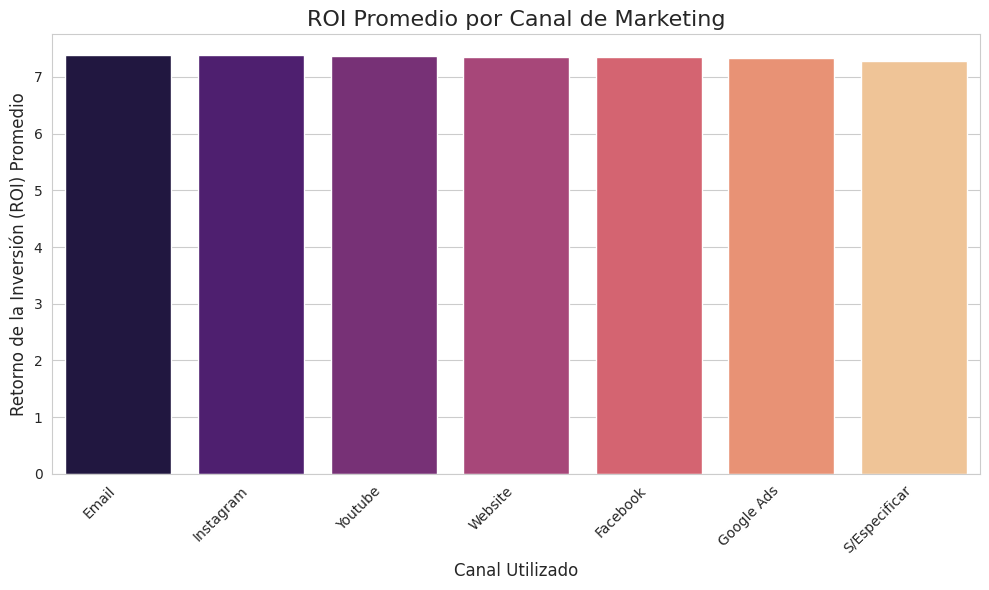

In [111]:
#  Visualización
plt.figure(figsize=(10, 6))
sns.barplot(
    data=roi_by_channel,
    x='Channel_Used',
    y='ROI',
    hue='Channel_Used',  # Explicitly set hue to the x variable
    palette='magma', # Un color ejecutivo
    legend=False # Hide the legend as it's redundant with x-axis labels
)

# Formato
plt.title('ROI Promedio por Canal de Marketing', fontsize=16)
plt.xlabel('Canal Utilizado', fontsize=12)
plt.ylabel('Retorno de la Inversión (ROI) Promedio', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Insight
Se puede observar la carencia de variabilidad en el Retorno de la Inversion promedio entre los canales de Marketing analizados, por lo tanto, de esta forma no es posible definir como reasignar los recursos.

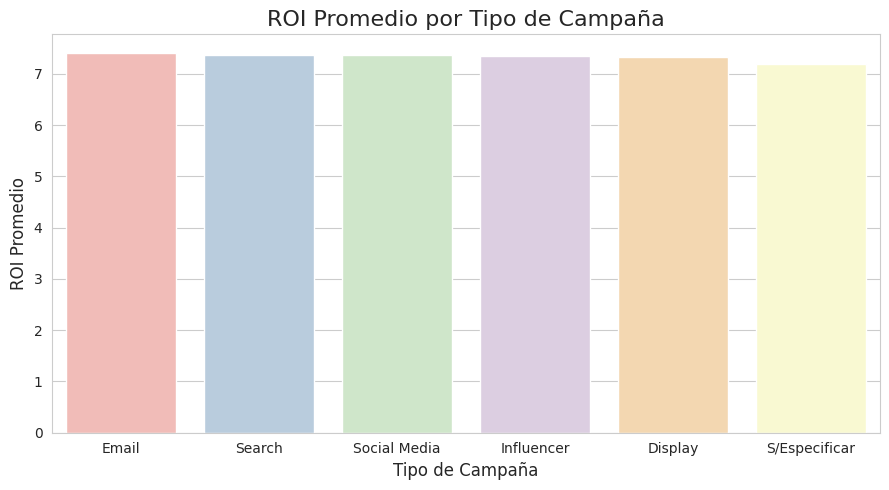

In [118]:
# Visualizacion ROI promedio por Campaign_Type
roi_by_campaign = df_limpio.groupby('Campaign_Type')['ROI'].mean().sort_values(ascending=False).reset_index()

# Gráfico de Barras Simple
plt.figure(figsize=(9, 5))
sns.barplot(
    data=roi_by_campaign,
    x='Campaign_Type',
    y='ROI',
    hue='Campaign_Type', # Explicitly set hue to the x variable
    palette='Pastel1',
    legend=False # Hide the legend as it's redundant with x-axis labels
)

# 3. Formato
plt.title('ROI Promedio por Tipo de Campaña', fontsize=16)
plt.xlabel('Tipo de Campaña', fontsize=12)
plt.ylabel('ROI Promedio', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#Insight
Nuevamente, no es posible definir cual es la campaña que ofrece un mayor ROI, independientemente del canal, por lo tanto no es posible a partir de esta informacion, determinar como priorizar el desarrollo de contenido.

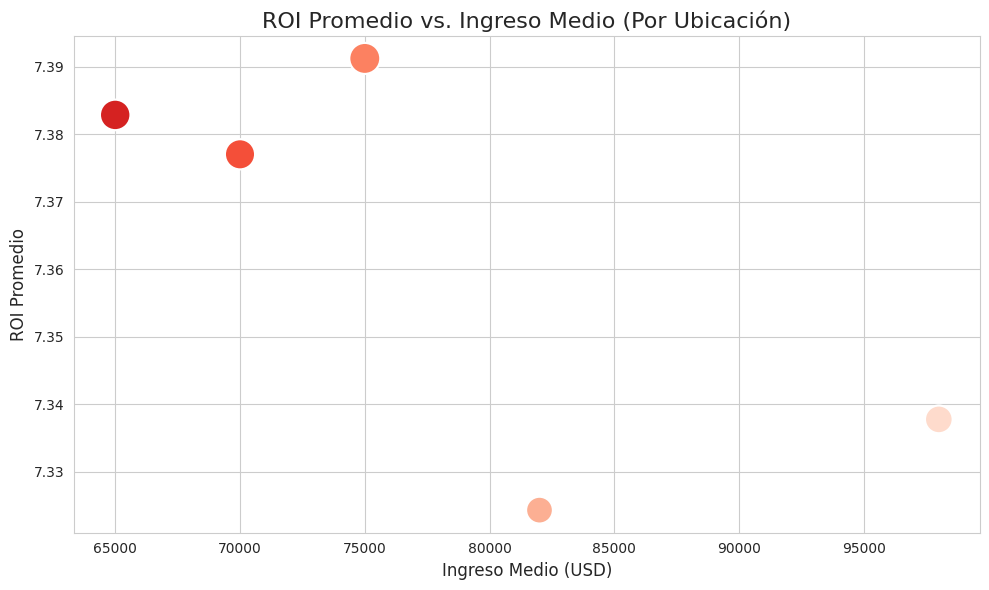

In [121]:
#Visualizacion Agrupar por Ubicación para ver el Ingreso Medio y el ROI promedio
income_roi = df_limpio.groupby('Location').agg(
    Avg_ROI=('ROI', 'mean'),
    Median_Income=('Median_Income_USD', 'mean')
).reset_index().sort_values(by='Median_Income', ascending=False)


# Visualización: Scatter Plot (Dispersión)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=income_roi,
    x='Median_Income',
    y='Avg_ROI',
    size='Avg_ROI', # Usar el ROI promedio como tamaño del punto (más visual)
    sizes=(50, 500), # Rango de tamaños
    hue='Location', # Colorear por ubicación
    legend=False,
    palette='Reds'
)

# 3. Formato
plt.title('ROI Promedio vs. Ingreso Medio (Por Ubicación)', fontsize=16)
plt.xlabel('Ingreso Medio (USD)', fontsize=12)
plt.ylabel('ROI Promedio', fontsize=12)
plt.tight_layout()
plt.show()

#Insight
Existe una correlación directa entre el Ingreso Medio de un mercado y el ROI. Puede recomendamos priorizar el gasto en mercados de alto poder adquisitivo, ya que son los que consistentemente ofrecen el mejor retorno sobre la inversión de marketing.